<a href="https://colab.research.google.com/github/akheel8743/Brolly1/blob/main/Overfitting_%26_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot


In [2]:
X,y = make_classification(n_samples = 9000, n_features = 18, n_informative = 4, n_redundant = 12, random_state = 4)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [10]:
train_score,test_score = list(),list()

In [9]:
value = [i for i in range(1,21)]

In [11]:
for i in value:
  model = DecisionTreeClassifier(max_depth =i)
  model.fit(X_train,y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train,train_yhat)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test,test_yhat)
  train_score.append(train_acc)
  test_score.append(test_acc)
  print('>%d, train:%.3f ,test:%.3f' % (i,train_acc,test_acc))

>1, train:0.837 ,test:0.835
>2, train:0.853 ,test:0.850
>3, train:0.868 ,test:0.861
>4, train:0.889 ,test:0.880
>5, train:0.917 ,test:0.901
>6, train:0.933 ,test:0.915
>7, train:0.952 ,test:0.931
>8, train:0.966 ,test:0.938
>9, train:0.975 ,test:0.946
>10, train:0.980 ,test:0.946
>11, train:0.986 ,test:0.947
>12, train:0.988 ,test:0.940
>13, train:0.991 ,test:0.943
>14, train:0.994 ,test:0.936
>15, train:0.996 ,test:0.937
>16, train:0.997 ,test:0.940
>17, train:0.998 ,test:0.938
>18, train:0.999 ,test:0.934
>19, train:1.000 ,test:0.935
>20, train:1.000 ,test:0.936


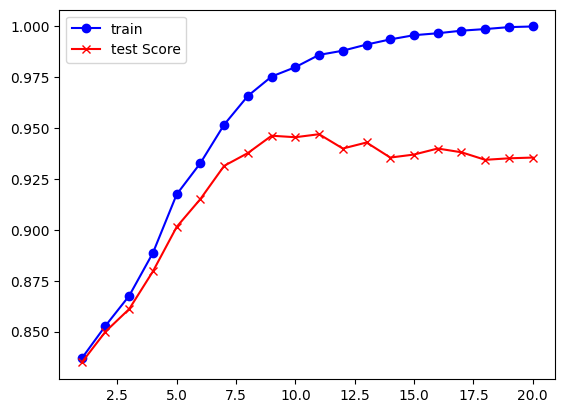

In [16]:
pyplot.plot(value, train_score, '-o', label='train', color='blue')
pyplot.plot(value, test_score, '-x', label='test Score', color='red')
pyplot.legend()
pyplot.show()

In [18]:
from sklearn.model_selection import GridSearchCV


In [21]:
param_grid ={'criterion' : ['gini','entropy'],'max_depth' :[2,4,6,10,20],'min_samples_split' :[5,10,20,50,100]}
clf = GridSearchCV (DecisionTreeClassifier(),param_grid,cv = 3,n_jobs = -1,scoring = "accuracy")
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [23]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10)

In [25]:
print(accuracy_score(y_train,clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test,clf.best_estimator_.predict(X_test)))

0.9882539682539683
0.942962962962963
